In [ ]:
pip install flair

In [2]:
from datetime import datetime
import requests
import pandas as pd
import seaborn as sns

In [3]:
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALxdMQEAAAAAQLauISsmwNTTuOUiyjIY9Snq0JE%3DAM4UuquXRQvENnoZ6MCtSuAZws71IOWzApcPa1kWYInJwsQEJP'

In [4]:
params = {'q': 'GME',
            'tweet_mode': 'extended','lang': 'en',
            'count': '500'}
response=requests.get('https://api.twitter.com/1.1/search/tweets.json',params=params,
                        headers={'authorization': 'Bearer '+BEARER_TOKEN})

In [ ]:
print(response.json())

In [17]:
def get_data(tweet):
  data = {
      'id': tweet['id_str'],
      'created_at': tweet['created_at'],
      'text': tweet['full_text']
  }
  return data

In [18]:
df = pd.DataFrame()
for tweet in response.json()['statuses']:
  row = get_data(tweet)
  df = df.append(row, ignore_index=True)

In [19]:
tweets = df['text']
txts = tweets.to_list()

In [ ]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

In [21]:
values = []
confidence = []
for txt in txts:
  sentence = flair.data.Sentence(txt)
  sentiment_model.predict(sentence)
  v = sentence.labels[0].to_dict()['value']
  c = sentence.labels[0].to_dict()['confidence']
  values.append(v)
  confidence.append(c)

In [22]:
df['values'] = values
df['confidence'] = confidence

In [ ]:
df

In [24]:
df.groupby(by='values').agg('count')

,created_at,id,text,confidence
values,,,,
NEGATIVE,60,60,60,60
POSITIVE,40,40,40,40


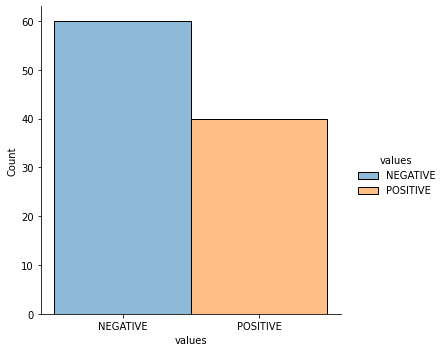

In [25]:
sns.displot(df,x='values', hue='values' )